## Gaussian Transformation with Feature-Engine - 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import feature_engine.transformation as vt

In [2]:
data = pd.read_excel('HousingPrices.xls')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## Plots to assess normality

To visualise the distribution of the variables, we plot a **histogram and a Q-Q plot**. In the Q-Q pLots, if the variable is normally distributed, the values of the variable should **fall in a 45 degree line** when plotted against the theoretical quantiles.

**Plot the histograms to have a quick look at the variable distribution! Histogram and Q-Q plots!**

In [3]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

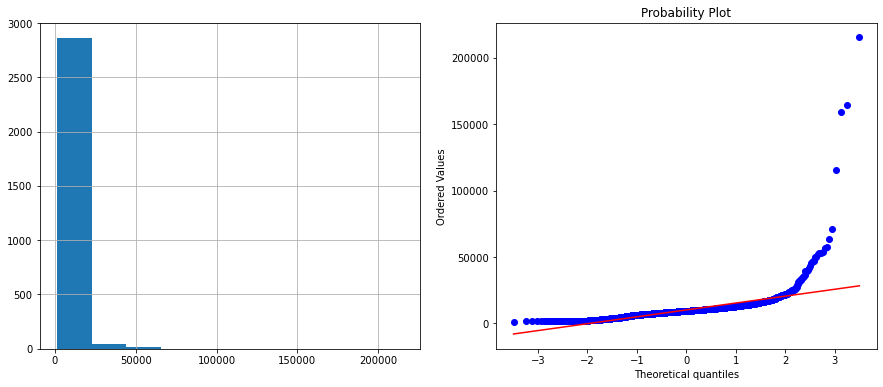

In [4]:
diagnostic_plots(data, 'LotArea')

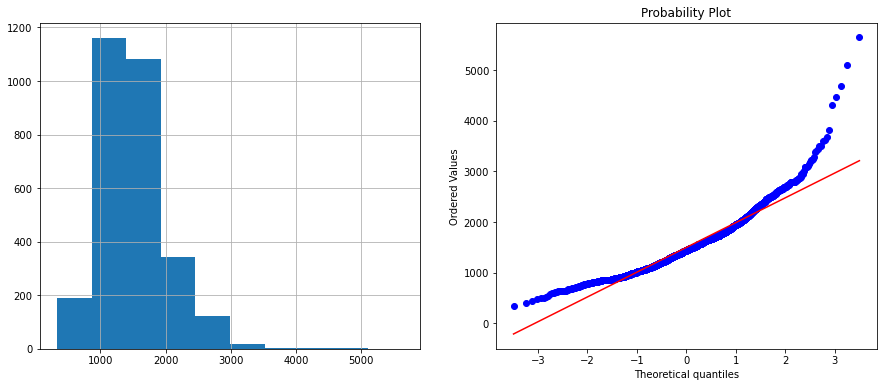

In [5]:
diagnostic_plots(data, 'GrLivArea')

## LogTransformer

In [6]:
lt = vt.LogTransformer(variables = ['LotArea', 'GrLivArea'])
lt.fit(data)

LogTransformer(variables=['LotArea', 'GrLivArea'])

**Variables that will be transformed!**

In [7]:
lt.variables_

['LotArea', 'GrLivArea']

In [8]:
data_tf = lt.transform(data)

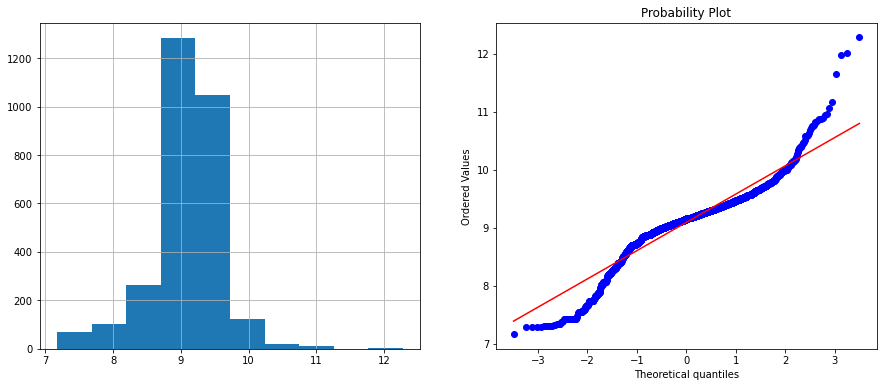

In [9]:
diagnostic_plots(data_tf, 'LotArea')

**Transformed variable!**

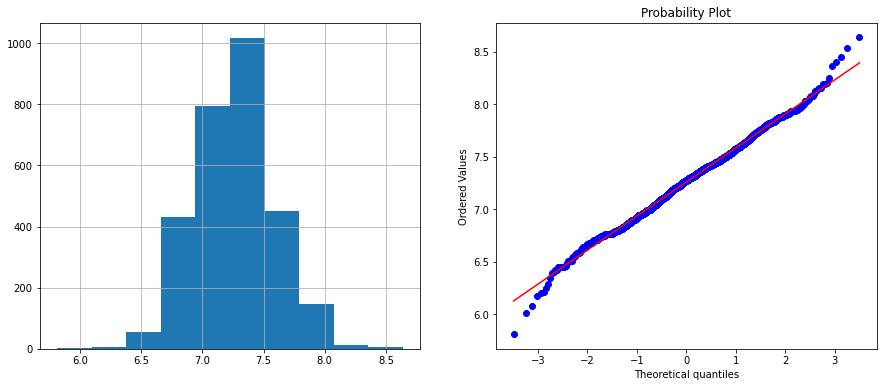

In [10]:
diagnostic_plots(data_tf, 'GrLivArea')

## ReciprocalTransformer

In [11]:
rt = vt.ReciprocalTransformer(variables = ['LotArea', 'GrLivArea'])
rt.fit(data)

ReciprocalTransformer(variables=['LotArea', 'GrLivArea'])

In [12]:
data_tf = rt.transform(data)

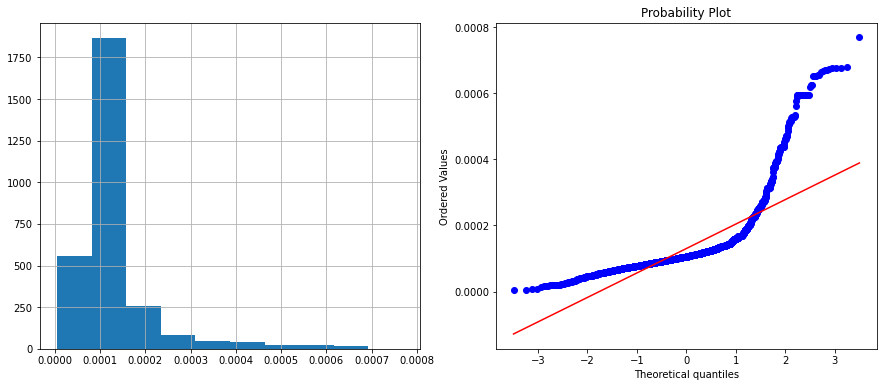

In [13]:
diagnostic_plots(data_tf, 'LotArea')

**Transformed variable!**

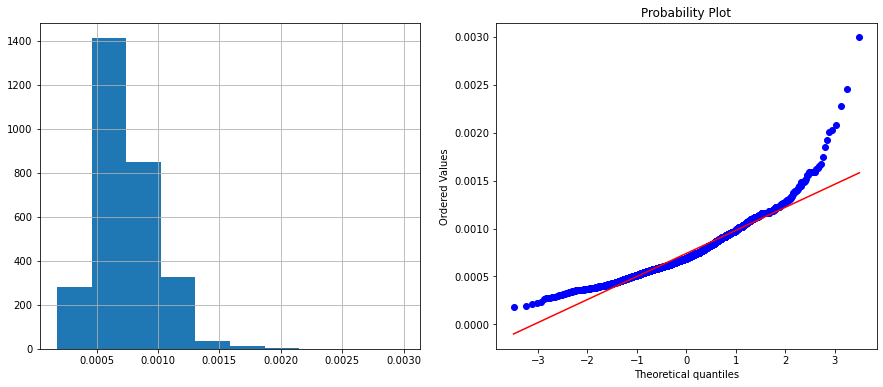

In [14]:
diagnostic_plots(data_tf, 'GrLivArea')

## ExponentialTransformer

In [15]:
et = vt.PowerTransformer(variables = ['LotArea', 'GrLivArea'])
et.fit(data)

PowerTransformer(variables=['LotArea', 'GrLivArea'])

In [16]:
data_tf = et.transform(data)

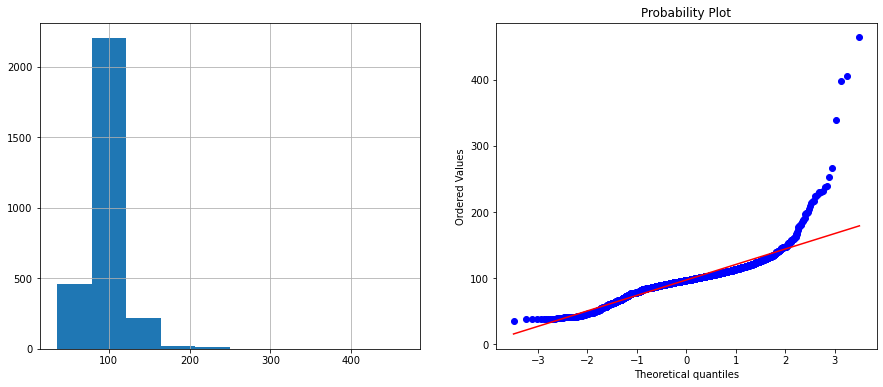

In [17]:
diagnostic_plots(data_tf, 'LotArea')

**Transformed variable!**

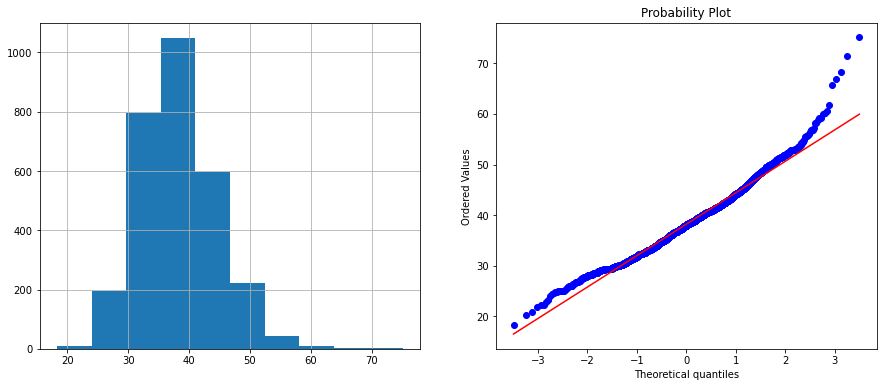

In [18]:
diagnostic_plots(data_tf, 'GrLivArea')

## BoxCoxTransformer

In [19]:
bct = vt.BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])
bct.fit(data)

BoxCoxTransformer(variables=['LotArea', 'GrLivArea'])

**The exponents for the BoxCox transformation!**

In [20]:
bct.lambda_dict_

{'LotArea': 0.1300615674135057, 'GrLivArea': -0.011741655231629719}

In [21]:
data_tf = bct.transform(data)

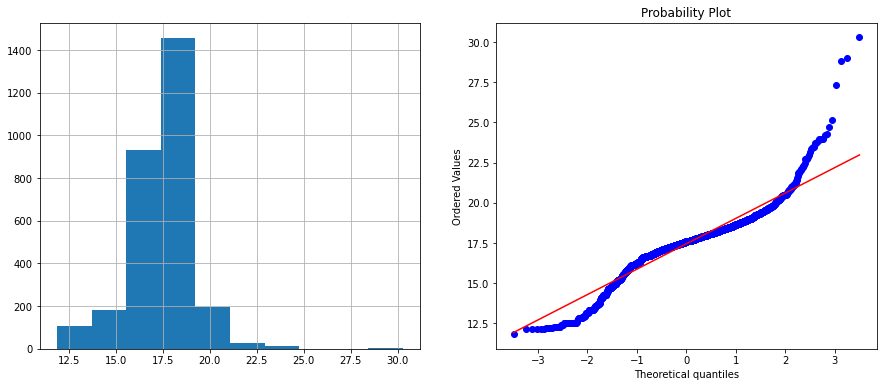

In [22]:
diagnostic_plots(data_tf, 'LotArea')

**Transformed variable!**

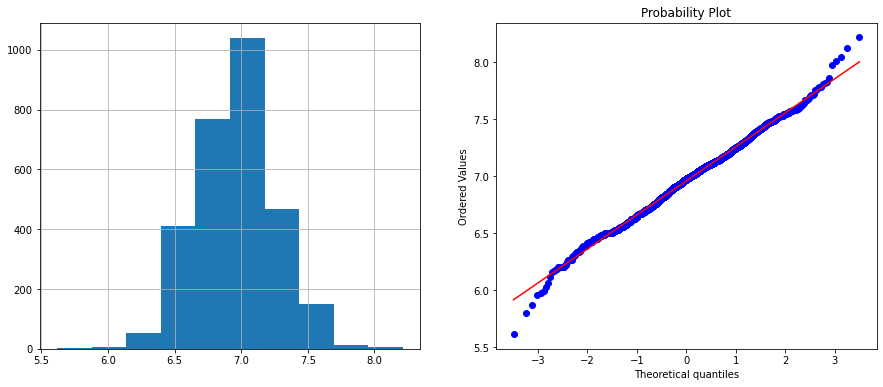

In [23]:
diagnostic_plots(data_tf, 'GrLivArea')

## Yeo-Johnson Transformer

Yeo-Johnson Transformer will be available in the next release of Feauture-Engine!!!

In [24]:
yjt = vt.YeoJohnsonTransformer(variables = ['LotArea', 'GrLivArea'])
yjt.fit(data)

2022-02-02 04:41:50,723 [2968] WARNING  py.warnings:109: [JupyterRequire] C:\Users\husey\anaconda3\lib\site-packages\scipy\stats\morestats.py:1557: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))

2022-02-02 04:41:50,727 [2968] WARNING  py.warnings:109: [JupyterRequire] C:\Users\husey\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2621: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom

2022-02-02 04:41:50,730 [2968] WARNING  py.warnings:109: [JupyterRequire] C:\Users\husey\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2214: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)

2022-02-02 04:41:50,730 [2968] WARNING  py.warnings:109: [JupyterRequire] C:\Users\husey\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)

YeoJohnsonTransformer(variables=['LotArea', 'GrLivArea'])

**The exponents for the Yeo-Johnson transformation!**

In [25]:
yjt.lambda_dict_

{'LotArea': -8.16922204235409, 'GrLivArea': -8.16922204235409}

In [26]:
data_tf = yjt.transform(data)

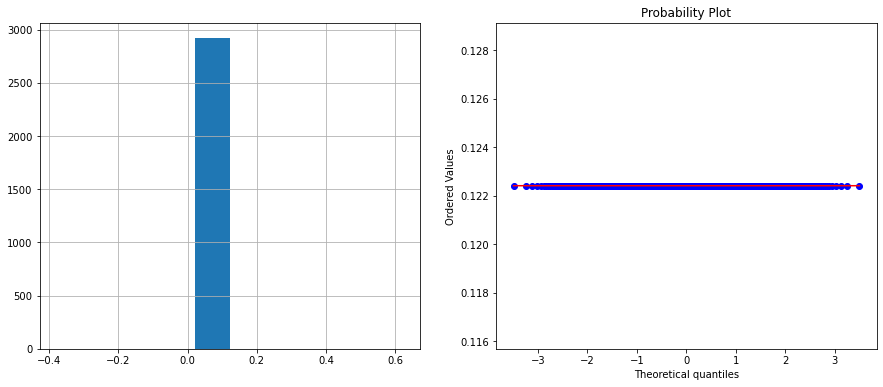

In [27]:
diagnostic_plots(data_tf, 'LotArea')

**Transformed variable!**

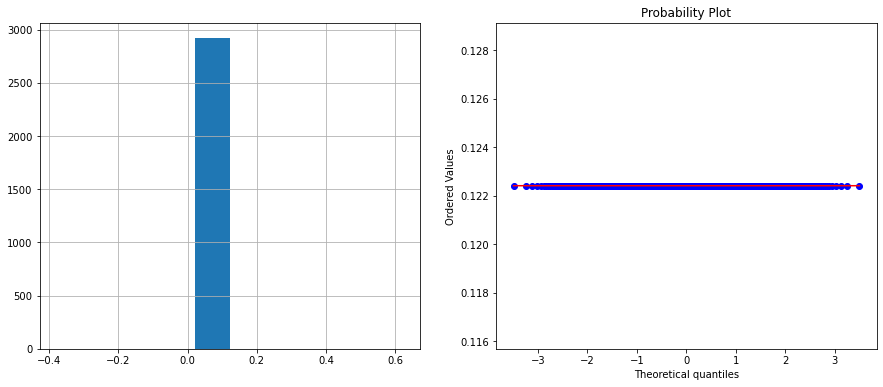

In [28]:
diagnostic_plots(data_tf, 'GrLivArea')